In [11]:
import numpy as np
from fourier import compute_fourier_coeff
from signal_functions import truncated_sine_series
from fourier import compute_fourier_coeff
from kernels import complex_exponential_kernel, cosine_kernel
from inference_utils import  run_inference_prediction
from plotting import  plot_true_vs_approximation

import matplotlib.pyplot as plt

In [12]:

#TODO
# lambda has to be very small (and not only depend on N) to get a good approx

#why are the Fourier coefficients of the kernel also negative? the imaginary part seems small enough

__Source conditions__:

$$ 
\sum_{l \in \mathbb{Z}} \frac{{|\hat{w}^\ast_l|^2 } }{\hat{k}_l( \hat{k}_l \mathbb{E}[|\hat{X}_l|^2])^{2\alpha}}  < + \infty
$$

with  $ \gamma_l :=  \hat{k}_l\, \mathbb{E}[|\hat{X}_l|^2] $ eigenvalues of covariance operator.

In [13]:
#CHOOSE number of input functions
num_samples = 10

grid_size = 2**11 # grid points

t_left = -0
t_right = 1

time_span = t_right - t_left

time_array = np.linspace(t_left,t_right,grid_size)


In [14]:
input_signals = 'time-loc'  # 'time-loc' or 'freq-loc'

In [15]:
#parameter for target signal
target_decay_rate = 1.1 # decay rate of the target signal

# parameter for kernel
kernel_decay_rate =  1.01 # decay rate of the kernel

if kernel_decay_rate <=1 or target_decay_rate<=1:
    raise ValueError("kernel_decay_rate and target_decay_rate must be > 1")

# time-loc signals
loc_parameter = 0.076 

if input_signals == 'time-loc':
    alpha_sup = (2*target_decay_rate -1 - kernel_decay_rate) / 2*kernel_decay_rate
    

# freq-loc signals 

freq_loc_inputs_decay = .1  

if input_signals == 'freq-loc':
    alpha_sup = (2*target_decay_rate -1 - kernel_decay_rate) / 2*(kernel_decay_rate + freq_loc_inputs_decay)


print("alpha_sup" , alpha_sup)

alpha_sup 0.09595000000000009


In [16]:
alpha = .9 * alpha_sup

lam_val = 1e-4, '1e-4'

noise = .02

In [17]:
# Ground truth function and observation  noise         
# y_i = x_i * target + noise, where x_i is the input signal

sum_terms_target = 30  # index  of truncation of the fourier series
target = truncated_sine_series(
    input_points=time_array, decay_rate=target_decay_rate, num_terms=sum_terms_target
)

##fourier coefficients of w_true
target_fourier_coeff = compute_fourier_coeff(
    target, time_span
)  # normalized by the number of grid points


# for freq-loc inputs
max_sum_freq_signals = sum_terms_target

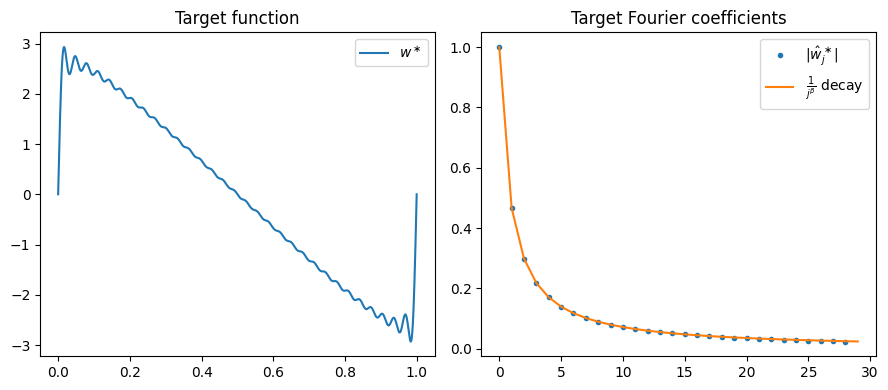

In [18]:
# Visualize the target function and its fourier coefficients decay

#plot the true function and its fourier coefficients in two subplots
fig,(ax1, ax2)  = plt.subplots(1,2,figsize=(9, 4))
ax1.plot(time_array,target, label = r'$w^\ast$')
ax1.set_title('Target function')
ax1.legend()

ax2.plot(np.abs(target_fourier_coeff)[1:sum_terms_target], '.', label=r'$|\hat{w}^\ast_j|$')
# Create auxiliary vector for decay comparison
j_values = np.arange(1, target_fourier_coeff.size + 1, dtype=float)

ax2.plot(j_values[:sum_terms_target]**(-target_decay_rate), label=r'$\frac{1}{j^\beta}$ decay')
ax2.set_title('Target Fourier coefficients')
ax2.legend()
plt.tight_layout()

In [19]:
# the kernel

sum_terms_kernel = sum_terms_target

# evaluated_kernel = complex_exponential_kernel(time_array, kernel_decay_rate, sum_terms_kernel)
evaluated_kernel = diri

kernel_coeff = compute_fourier_coeff(evaluated_kernel, time_span)
kernel_coeff_abs = np.abs(kernel_coeff)   ## CHECK WHY YOU NEED THIS!!

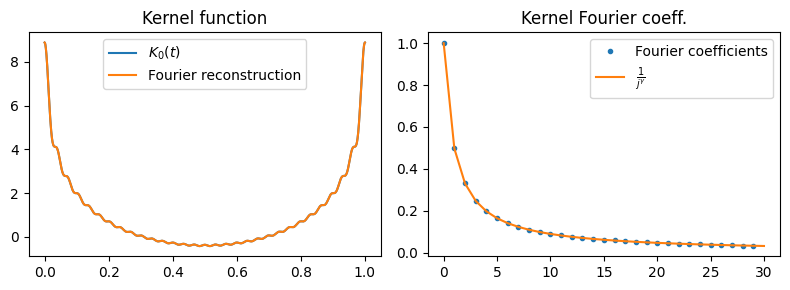

In [20]:
# visualize the kernel's fourier coefficients decay

fig,(ax1, ax2)  = plt.subplots(1,2,figsize=(8, 3))
ax1.plot(time_array, evaluated_kernel, label=r'$K_0(t)$')
ax1.set_title('Kernel function')
ax1.plot(time_array, np.fft.ifft(kernel_coeff*grid_size), label='Fourier reconstruction')
ax1.legend()

ax2.plot(kernel_coeff[1:sum_terms_kernel+1], '.', label='Fourier coefficients')
aux_vec=np.arange(1,kernel_coeff.size+1, dtype=float)
ax2.plot(aux_vec[:sum_terms_kernel+1]**(-kernel_decay_rate), label=r'$\frac{1}{j^\gamma}$')
ax2.set_title('Kernel Fourier coeff.')
ax2.legend()
plt.tight_layout()


1. __Frequency localized signals__: 
    $$X(t) = e^{2 \pi i L t} =  \cos(2 \pi L t) + i \sin(2 \pi L t) $$
    where $L$ is a $ \rho $-distributed random variable on $\mathbb{Z}$.
    
    Eigenvalues of covariance operator: $\gamma_l = \hat{k}_l \rho_l$ we choose $ \rho_l = \frac{1}{l^\eta} $


    Source conditions: 
    $$\sum_l \frac{l^{-2\beta}}{l^{-2\alpha(\gamma + \eta)} l^{-\gamma}} < \infty 
    \quad \rightarrow \quad \alpha < \frac{2 \beta -1 -\gamma}{2 (\gamma + \eta)}. $$




2. __Time localized signals__:  
    $$ X(t) = \frac{1}{2\delta}{1}_{[0,2 \delta]} (t-T) $$
    with $T$ random variable on $G$ and $\delta>0$.
    We choose $T \sim \mathcal{N}(\mu,\sigma^2)$.

    Eigenvalues of the covariance operator: $\gamma_j= \hat{k}_j  \text{sinc}^2({ 2 \pi \delta l } ) .$
    

In [22]:
#freq-loc
max_value = sum_terms_kernel + 10

In [23]:
# kernel_coeff   #SHOULD BE REAL AND POSITIVE!!!!


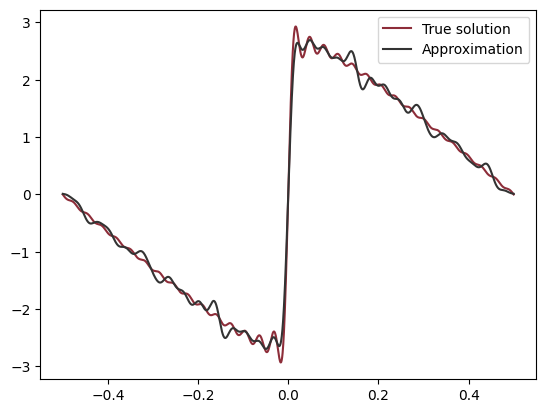

In [27]:
# run inference for time-localized signals
prediction = run_inference_prediction(
    signal_loc_type=input_signals,
    num_samples=num_samples,
    time_array=time_array,
    time_span=time_span,
    kernel_coeff=kernel_coeff_abs,
    target_fourier_coeff=target_fourier_coeff,
    noise=noise,
    time_grid_points=grid_size,
    alpha=alpha,
    series_truncation=sum_terms_kernel,
    loc_parameter=loc_parameter
)
plot_true_vs_approximation(time_array, target, prediction)
#something not right: you should see the difference in prediction between 3 and 15 or 30 samples!!!!

In [ ]:
w_fourier = np.zeros(time_array.size, dtype=np.complex128)

# for l in range(t.size):
#     nominator = (X_fourier_conj[l,:] * Y_fourier[l,:]).sum() / N
#     denominator = (np.abs(X_fourier[l,:])**2).sum() / N + lamb * (1 / kernel_coeff[l])
#     w_fourier[l] = nominator / denominator

for l in range(time_array.size):
    eigenval = kernel_coeff[l] * (np.abs(X_fourier[l,:])**2).sum() / num_samples
    term1 = kernel_coeff[l] / (eigenval + lamb)
    term2 = (X_fourier_conj[l,:] * Y_fourier[l,:]).sum() / num_samples

    w_fourier[l] = term1 * term2



In [ ]:
w = np.fft.ifft(w_fourier * grid_size ) 
# true_w = np.fft.ifft(true_w_coeff * d )

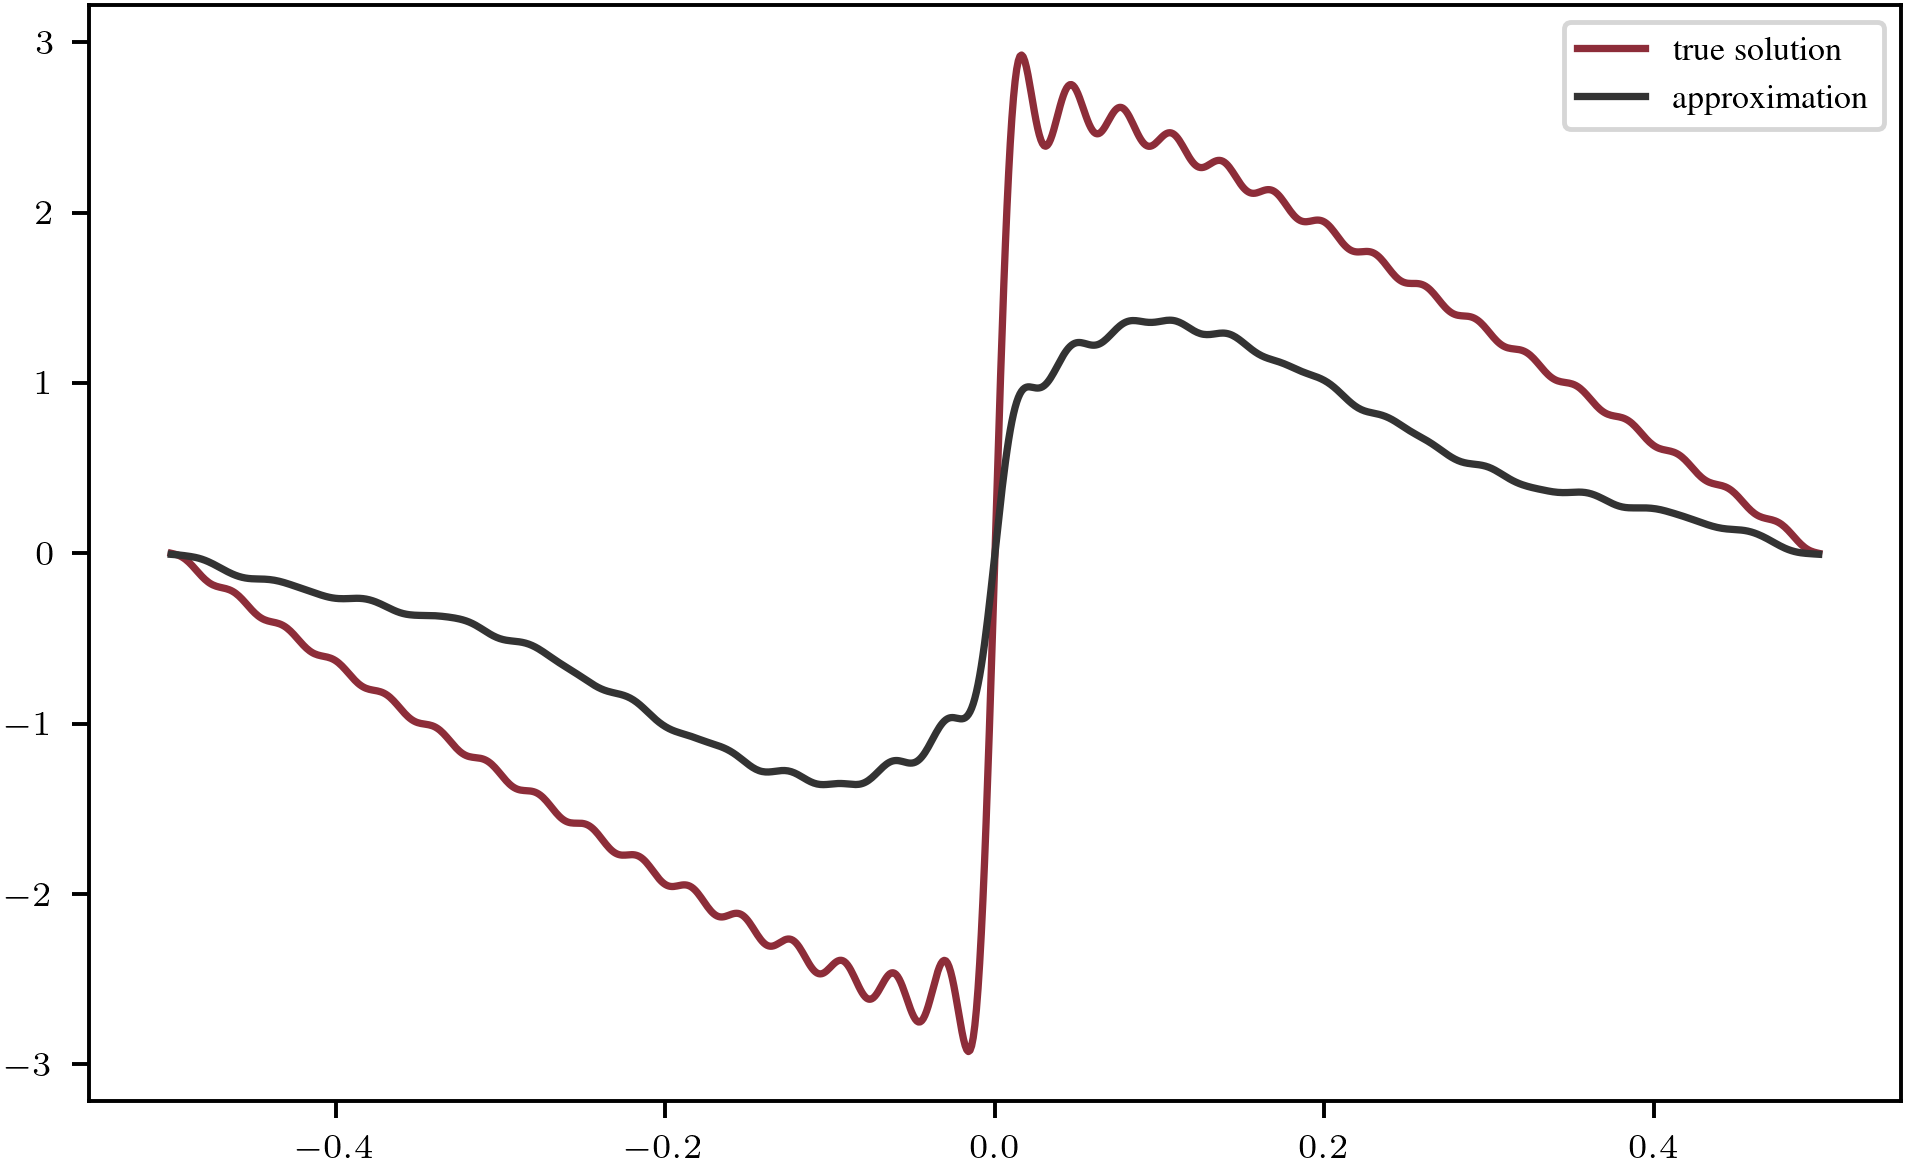

In [ ]:
from tueplots import  bundles
plt.rcParams.update(bundles.neurips2023())
plt.rcParams.update({"figure.dpi": 350})


#define colors
red = np.array([141.0, 45.0, 57.0]) / 255.0
dark = np.array([51.0, 51.0, 51.0]) / 255.0

#plot true solution and w
fig, ax = plt.subplots(1, )
ax.plot(time_array, target, label='true solution', color = red)
ax.plot(time_array, w , label='approximation', color = dark)
ax.legend()


In [ ]:
w_diff_coeff = w_fourier - true_w_coeff
# w_diff_coeff = np.fft.fft(w)/d + np.fft.fft(true_w)/d
error_h_squared = (np.abs(w_diff_coeff[:M])**2 / kernel_coeff[:M]).sum()

In [ ]:
# plt.plot(w_diff_coeff[:100], 'o')

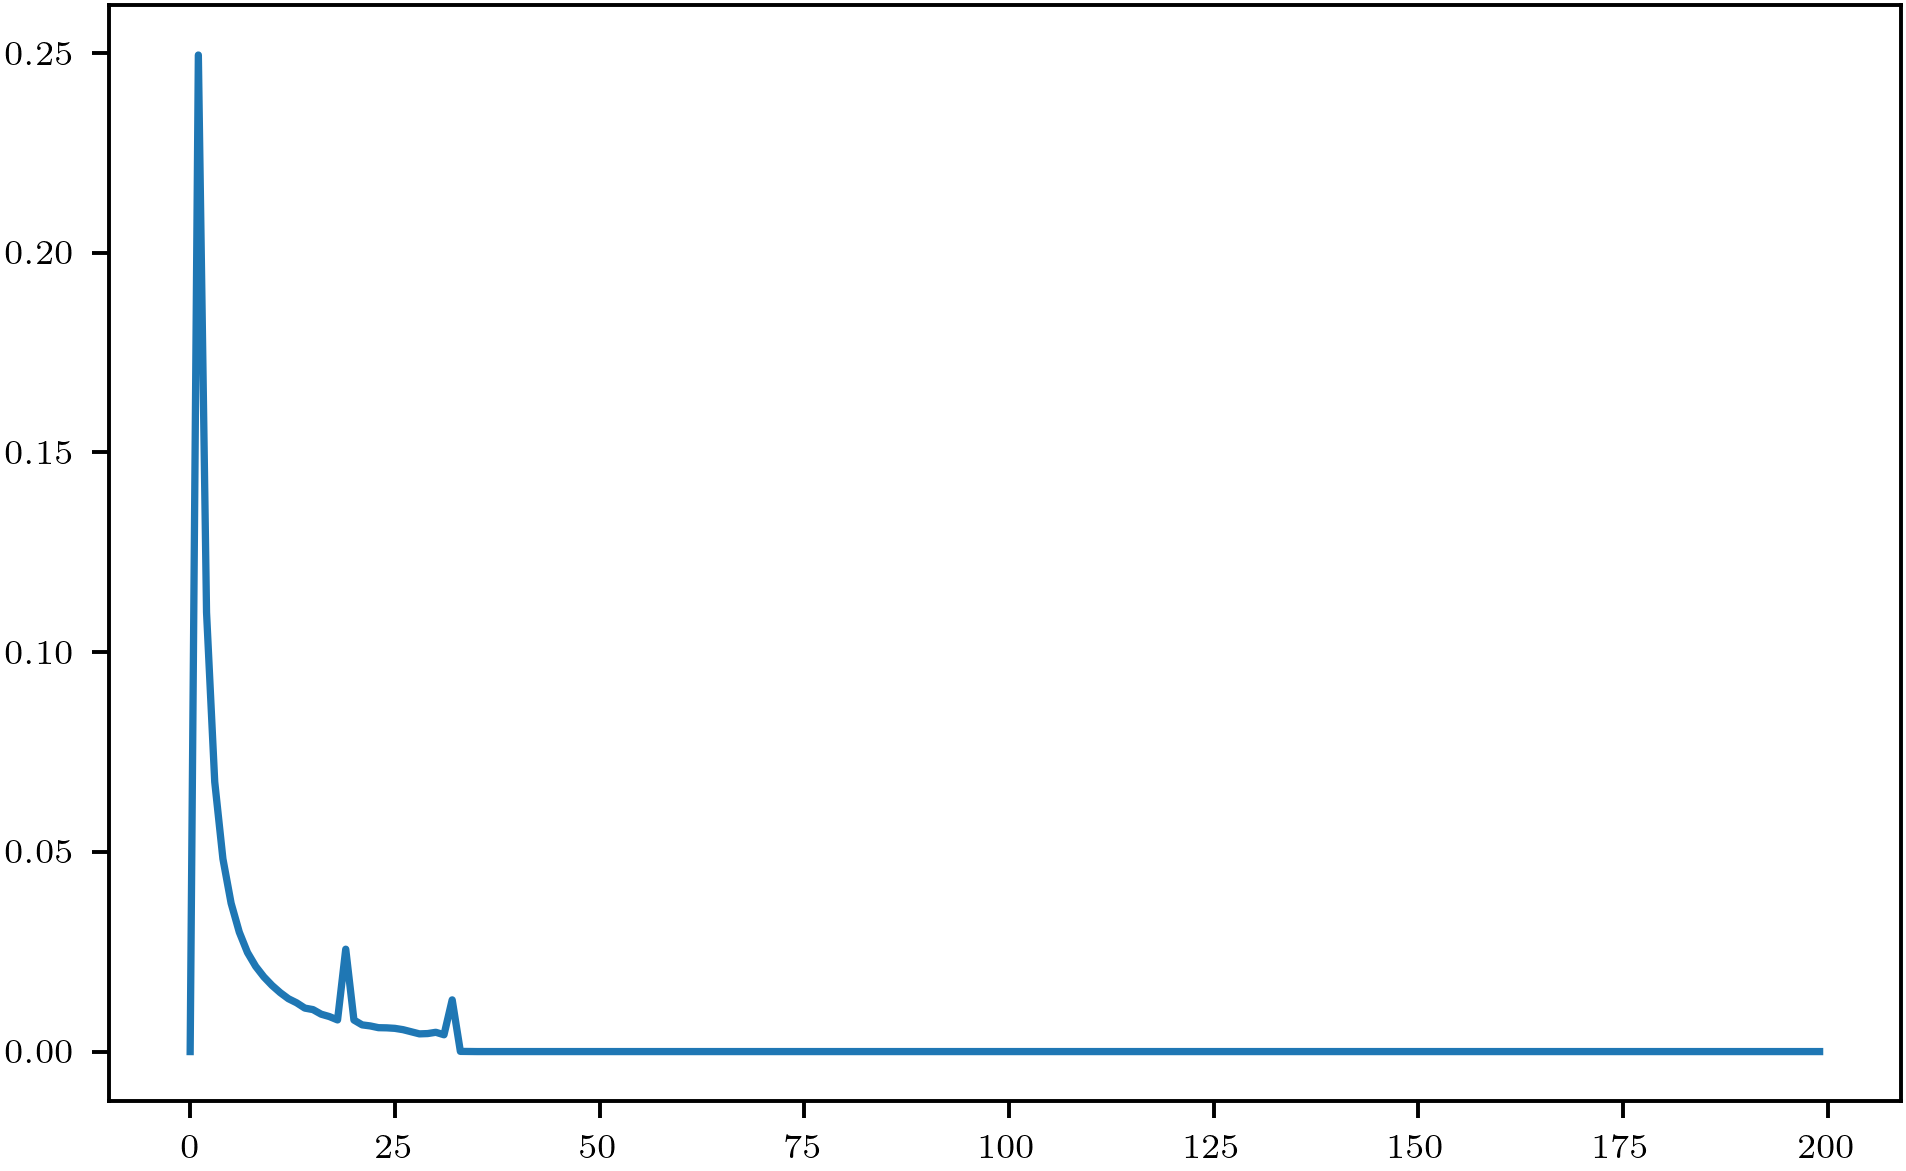

In [ ]:
until = 12000
eps = 1e-10

vec = np.abs(w_diff_coeff[:M+100])**2 / (kernel_coeff[:M+100])
plt.plot( vec)


In [ ]:
error_h_squared

0.8171045735384806